<a href="https://colab.research.google.com/github/antoniojfp1/Analitica/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Casos positivos de COVID-19 en Colombia EDA (Exploratory Data Analytics)**


In [ ]:
import pandas as pd

# **1. Datos Crudos**

In [ ]:
df = pd.read_csv('https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD');

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head(5)

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico,ubicación recuperado
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN,Casa
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Negro,NaN,Casa
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN,Casa
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,Casa
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN,Casa


# **Limpieza de datos**

In [ ]:
df.columns

Index(['ID de caso', 'Fecha de notificación', 'Código DIVIPOLA',
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'FIS',
       'Fecha de muerte', 'Fecha diagnostico', 'Fecha recuperado',
       'fecha reporte web', 'Tipo recuperación', 'Codigo departamento',
       'Codigo pais', 'Pertenencia etnica', 'Nombre grupo etnico',
       'ubicación recuperado'],
      dtype='object')

In [ ]:
df.drop(columns=['Fecha de notificación', 'Código DIVIPOLA','Tipo','País de procedencia', 'FIS',
       'Fecha de muerte', 'Fecha recuperado',
       'fecha reporte web', 'Tipo recuperación', 'Codigo departamento',
       'Codigo pais', 'Pertenencia etnica', 'Nombre grupo etnico'],inplace=True);

In [ ]:
df.head(5)

,ID de caso,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Estado,Fecha diagnostico,ubicación recuperado
0,1,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Leve,2020-03-06T00:00:00.000,Casa
1,2,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Leve,2020-03-09T00:00:00.000,Casa
2,3,Medellín,Antioquia,Recuperado,50,F,Leve,2020-03-09T00:00:00.000,Casa
3,4,Medellín,Antioquia,Recuperado,55,M,Leve,2020-03-11T00:00:00.000,Casa
4,5,Medellín,Antioquia,Recuperado,25,M,Leve,2020-03-11T00:00:00.000,Casa


Se agrega campo con el mes para determinar la seria de tiempo

# **Analisis de tiempo**

In [ ]:
import datetime as dt

In [ ]:
df["Fecha diagnostico"] = pd.to_datetime(df["Fecha diagnostico"]);

In [ ]:
mes = df["Fecha diagnostico"].dt.month;

In [ ]:
df["Mes"] = mes;

In [ ]:
df

,ID de caso,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Estado,Fecha diagnostico,ubicación recuperado,Mes
0,1,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Leve,2020-03-06,Casa,3.0
1,2,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Leve,2020-03-09,Casa,3.0
2,3,Medellín,Antioquia,Recuperado,50,F,Leve,2020-03-09,Casa,3.0
3,4,Medellín,Antioquia,Recuperado,55,M,Leve,2020-03-11,Casa,3.0
4,5,Medellín,Antioquia,Recuperado,25,M,Leve,2020-03-11,Casa,3.0
...,...,...,...,...,...,...,...,...,...,...
1033213,1033254,Albania,La Guajira,Casa,55,F,Leve,2020-10-26,Casa,10.0
1033214,1033255,Albania,La Guajira,Casa,57,M,Leve,2020-10-26,Casa,10.0
1033215,1033256,Cartago,Valle del Cauca,Casa,41,M,Leve,2020-10-26,Casa,10.0
1033216,1033257,Cartago,Valle del Cauca,Casa,21,M,Leve,2020-10-26,Casa,10.0


In [ ]:
import seaborn as sns

In [ ]:
columns = ['Mes'];
grupos = [df['Fecha diagnostico'].dt.month];
df_mes = df[columns].groupby(by=grupos).count();
df_mes.reset_index(inplace=True);
df_mes.columns = ['Periodo','Cantidad']
df_mes

,Periodo,Cantidad
0,3.0,909
1,4.0,5591
2,5.0,23013
3,6.0,68691
4,7.0,216750
5,8.0,314631
6,9.0,219755
7,10.0,179588


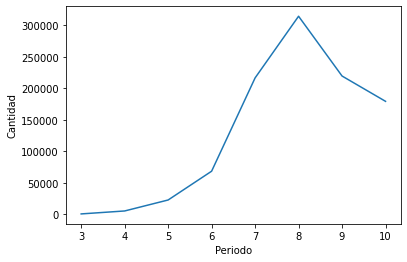

In [ ]:
sns.lineplot(data=df_mes,x='Periodo',y='Cantidad');

# **Analisis de condicion de salud**

Se defienen los grupos etareos por edad

In [ ]:
def GrupoEtareo(edad):
  if edad == 0:
    return "Recien nacido"
  elif edad >= 1 and edad < 6:
    return "Primera Infancia"
  elif edad >= 6 and edad < 12:
    return "Infancia" 
  elif edad >= 12 and edad < 18:
    return "Adolecenncia"
  elif edad >= 18 and edad < 45:
    return "Juventud"
  elif edad >= 45 and edad < 60:
    return "Adultez"
  elif edad >= 60:
    return "Vejez"  
  else:
    return "No Registra"

ge = df.apply(lambda row: GrupoEtareo(row['Edad']), axis=1);
df['Grupo Etareo'] = ge;
df.head(5)

,ID de caso,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Estado,Fecha diagnostico,ubicación recuperado,Mes,Grupo Etareo
0,1,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Leve,2020-03-06,Casa,3.0,Juventud
1,2,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Leve,2020-03-09,Casa,3.0,Juventud
2,3,Medellín,Antioquia,Recuperado,50,F,Leve,2020-03-09,Casa,3.0,Adultez
3,4,Medellín,Antioquia,Recuperado,55,M,Leve,2020-03-11,Casa,3.0,Adultez
4,5,Medellín,Antioquia,Recuperado,25,M,Leve,2020-03-11,Casa,3.0,Juventud


In [ ]:
columns = ['atención','Estado','Sexo','Grupo Etareo'];
grupos = ['atención','Estado','Sexo','Grupo Etareo'];
df_resultado = df[columns];
df_resultado['Total'] = 0;
df_resultado = df_resultado.groupby(columns).count();
df_resultado.reset_index(inplace=True);
df_resultado.columns = ['Lugar de Atención','Estado de Salud','Sexo del Paciente','Grupo Etareo del Paciente','Cantidad'];
df_resultado

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Lugar de Atención,Estado de Salud,Sexo del Paciente,Grupo Etareo del Paciente,Cantidad
0,Casa,Asintomático,F,Adolecenncia,203
1,Casa,Asintomático,F,Adultez,1089
2,Casa,Asintomático,F,Infancia,132
3,Casa,Asintomático,F,Juventud,2996
4,Casa,Asintomático,F,Primera Infancia,85
...,...,...,...,...,...
162,Recuperado,leve,M,Infancia,54
163,Recuperado,leve,M,Juventud,1350
164,Recuperado,leve,M,Primera Infancia,31
165,Recuperado,leve,M,Recien nacido,2


In [ ]:
df_resultado['Estado de Salud'].unique()

array(['Asintomático', 'Leve', 'Fallecido', 'Moderado', 'moderado',
       'Grave', 'LEVE', 'leve'], dtype=object)

In [ ]:
fallecido = df_resultado['Estado de Salud'] == 'Fallecido';
df_fallecido = df_resultado[fallecido];
df_fallecido

,Lugar de Atención,Estado de Salud,Sexo del Paciente,Grupo Etareo del Paciente,Cantidad
31,Fallecido,Fallecido,F,Adolecenncia,8
32,Fallecido,Fallecido,F,Adultez,1588
33,Fallecido,Fallecido,F,Infancia,3
34,Fallecido,Fallecido,F,Juventud,675
35,Fallecido,Fallecido,F,Primera Infancia,10
36,Fallecido,Fallecido,F,Recien nacido,10
37,Fallecido,Fallecido,F,Vejez,8656
38,Fallecido,Fallecido,M,Adolecenncia,8
39,Fallecido,Fallecido,M,Adultez,3590
40,Fallecido,Fallecido,M,Infancia,9


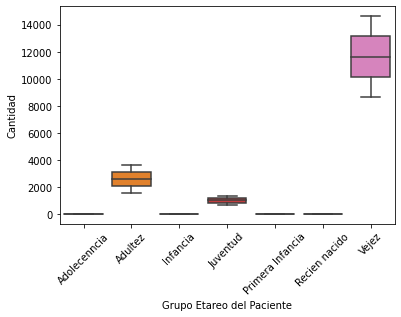

In [ ]:
sb = sns.boxplot(data=df_fallecido,x='Grupo Etareo del Paciente',y='Cantidad');
sb.set_xticklabels(sb.get_xticklabels(),rotation=45);

In [ ]:
grave = df_resultado['Estado de Salud'] == 'Grave';
df_grave = df_resultado[grave];
df_grave

,Lugar de Atención,Estado de Salud,Sexo del Paciente,Grupo Etareo del Paciente,Cantidad
79,Hospital UCI,Grave,F,Adolecenncia,6
80,Hospital UCI,Grave,F,Adultez,178
81,Hospital UCI,Grave,F,Infancia,3
82,Hospital UCI,Grave,F,Juventud,121
83,Hospital UCI,Grave,F,Primera Infancia,9
84,Hospital UCI,Grave,F,Recien nacido,14
85,Hospital UCI,Grave,F,Vejez,342
86,Hospital UCI,Grave,M,Adolecenncia,14
87,Hospital UCI,Grave,M,Adultez,356
88,Hospital UCI,Grave,M,Infancia,4


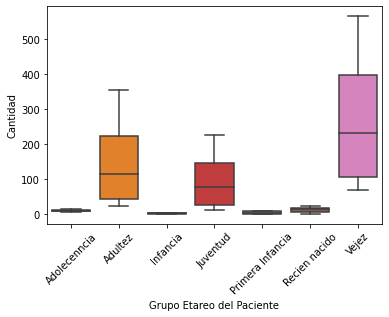

In [ ]:
sb = sns.boxplot(data=df_grave,x='Grupo Etareo del Paciente',y='Cantidad');
sb.set_xticklabels(sb.get_xticklabels(),rotation=45);

In [ ]:
moderado = df_resultado['Estado de Salud'].isin(['Moderado','moderado']);
df_moderado = df_resultado[moderado];
df_moderado

,Lugar de Atención,Estado de Salud,Sexo del Paciente,Grupo Etareo del Paciente,Cantidad
56,Hospital,Moderado,F,Adolecenncia,135
57,Hospital,Moderado,F,Adultez,1638
58,Hospital,Moderado,F,Infancia,95
59,Hospital,Moderado,F,Juventud,2096
60,Hospital,Moderado,F,Primera Infancia,170
61,Hospital,Moderado,F,Recien nacido,180
62,Hospital,Moderado,F,Vejez,2936
63,Hospital,Moderado,M,Adolecenncia,122
64,Hospital,Moderado,M,Adultez,2439
65,Hospital,Moderado,M,Infancia,102


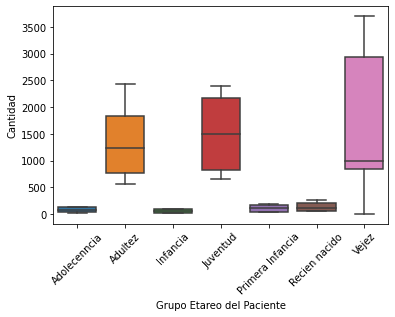

In [ ]:
sb = sns.boxplot(data=df_moderado,x='Grupo Etareo del Paciente',y='Cantidad');
sb.set_xticklabels(sb.get_xticklabels(),rotation=45);